In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from importlib import reload
import GEF
reload(GEF)
from GEF import GEF
#from GEF import GEF as GEF2
from utilities import PlotComp
from scipy.interpolate import CubicSpline, RectBivariateSpline
from scipy.integrate import quad
from scipy.optimize import fsolve
import os

In [43]:
alpha = 0.
Mpl = 1.
beta = 25.
M = 6e-6*Mpl
phi0 = 15.55*Mpl
dphidt0 = -np.sqrt(2/3)*M*Mpl
ini = {"phi":phi0, "dphi":dphidt0, "delta":1.0, "rhoChi":0.0}
SE = -1.0
ntr = 55
#G = GEF(alpha, beta, Mpl, ini, M, ntr, SE, AltDamp=0, approx=True)
#F = GEF(alpha, beta, Mpl, ini, M, ntr, SE, AltDamp=1, approx=True)
H = GEF(alpha, beta, Mpl, ini, M, ntr, SE, AltDamp=2, approx=True)

In [44]:
print(H.H0)

3.814203717684728e-05


In [ ]:
sol = H.RunGEF(t1=114.)

In [ ]:
H.IterateGEF(t1=114.)

In [44]:
print(sol)

None


In [45]:
H.Unitful()
omega=H.H0

file = "Out/GEF_Beta25.0_SE-1.0.dat"
input_df = pd.read_table(file, sep=",")
data = dict(zip(input_df.columns[1:],input_df.values[1:,1:].T))

N4 = data["N"]
xi4 = data["xi"]
xieff4 = data["xieff"]
dphi4 = data["dphi"]*omega
delta4 = data["delta"]
H4 = data["H"]*omega
rhoChi4 = data["rhoChi"]*omega**4
E4 = data["E"]*omega**4
B4 = data["B"]*omega**4
G4 = data["G"]*omega**4
sE4 = data["sigmaE"]*omega
s4 = data["s"]
kh4 = data["kh"]*omega

file = "Out/GEF_Beta25.0_SE-1.0_AltDamp_v4.dat"
input_df = pd.read_table(file, sep=",")
data = dict(zip(input_df.columns[1:],input_df.values[1:,1:].T))

N1 = data["N"]
xi1 = data["xi"]
xieff1 = data["xieff"]
dphi1 = data["dphi"]*omega
H1 = data["H"]*omega
delta1 = data["delta"]
rhoChi1 = data["rhoChi"]*omega**4
E1= data["E"]*omega**4
B1 = data["B"]*omega**4
G1 = data["G"]*omega**4
sE1 = data["sigmaE"]*omega
s1 = data["s"]
kh1 = data["kh"]*omega

t2 = H.vals["t"]
N2 = H.vals["N"]
xi2 = H.vals["xi"]
xieff2 = H.vals["xieff"]
dphi2 = H.vals["dphi"]
H2 = H.vals["H"]
delta2 = H.vals["delta"]
rhoChi2 = H.vals["rhoChi"]
E2= H.vals["E"]
B2 = H.vals["B"]
G2 = H.vals["G"]
sE2 = H.vals["sigmaE"]
s2 = H.vals["s"]
kh2 = H.vals["kh"]
khE = H.vals["khE"]
khO = H.vals["khO"]
kS = H.vals["kS"]
sk = H.vals["skh"]
sEk = H.vals["sigmaEkh"]

In [46]:
file = "Out/GEF_Beta25.0_SE-1.0_KDep_v4.dat"
input_df = pd.read_table(file, sep=",")
data = dict(zip(input_df.columns[1:],input_df.values[1:,1:].T))

t3 = data["t"]/omega
N3 = data["N"]
xi3 = data["xi"]
xieff3 = data["xieff"]
dphi3 = data["dphi"]*omega
H3 = data["H"]*omega
delta3 = data["delta"]
rhoChi3 = data["rhoChi"]*omega**4
E3 = data["E"]*omega**4
B3 = data["B"]*omega**4
G3 = data["G"]*omega**4
sE3 = data["sigmaE"]*omega
s3 = data["s"]
sk3 = data["skh"]
sEk3 = data["sigmaEkh"]*omega

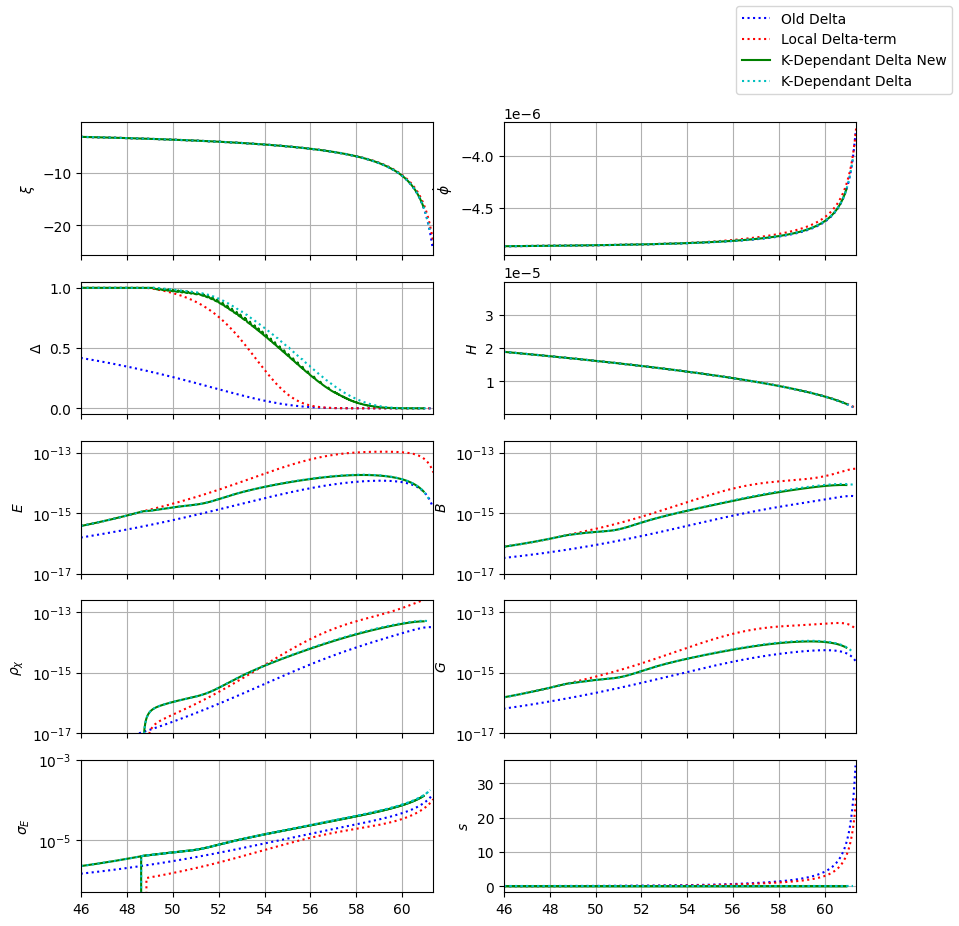

In [47]:
fig, ax = plt.subplots(5,2, figsize=(10,10), sharex=True)

ax[0,0].plot(N4, xi4, "b:", label="Old Delta")
ax[0,0].plot(N1, xi1, "r:", label="Local Delta-term")
ax[0,0].plot(N2, xi2, "g-", label="K-Dependant Delta New")
ax[0,0].plot(N3, xi3, "c:", label="K-Dependant Delta")
ax[0,0].set_ylabel(r"$\xi$")


ax[0,1].plot(N4, dphi4, "b:")
ax[0,1].plot(N1, dphi1, "r:")
ax[0,1].plot(N2, dphi2, "g-")
ax[0,1].plot(N3, dphi3, "c:")
ax[0,1].set_ylabel(r"$\dot{\phi}$")
#ax[0,1].set_ylabel(r"$\xi_{eff}$")

ax[1,0].plot(N4, delta4, "b:")
ax[1,0].plot(N1, delta1, "r:")
ax[1,0].plot(N2, delta2, "g-")
ax[1,0].plot(N3, delta3, "c:")
ax[1,0].set_ylabel(r"$\Delta$")

ax[1,1].plot(N4, H4, "b:")
ax[1,1].plot(N1, H1, "r:")
ax[1,1].plot(N2, H2, "g-")
ax[1,1].plot(N3, H3, "c:")
ax[1,1].set_ylabel(r"$H$")

ax[2,0].plot(N4, E4, "b:")
ax[2,0].plot(N1, E1, "r:")
ax[2,0].plot(N2, E2, "g-")
ax[2,0].plot(N3, E3, "c:")
ax[2,0].set_ylabel(r"$E$")
ax[2,0].set_yscale("log")

ax[2,1].plot(N4, B4, "b:")
ax[2,1].plot(N1, B1, "r:")
ax[2,1].plot(N2, B2, "g-")
ax[2,1].plot(N3, B3, "c:")
ax[2,1].set_ylabel(r"$B$")
ax[2,1].set_yscale("log")

ax[3,0].plot(N4, rhoChi4, "b:")
ax[3,0].plot(N1, rhoChi1, "r:")
ax[3,0].plot(N2, rhoChi2, "g-")
ax[3,0].plot(N3, rhoChi3, "c:")
ax[3,0].set_ylabel(r"$\rho_\chi$")
ax[3,0].set_yscale("log")

ax[3,1].plot(N4, abs(G4), "b:")
ax[3,1].plot(N1, abs(G1), "r:")
ax[3,1].plot(N2, abs(G2), "g-")
ax[3,1].plot(N3, abs(G3), "c:")
ax[3,1].set_ylabel(r"$G$")
ax[3,1].set_yscale("log")

ax[4,0].plot(N4, sE4, "b:")
ax[4,0].plot(N1, sE1, "r:")
ax[4,0].plot(N2, sE2, "g-")
ax[4,0].plot(N2, sEk, "g-")
ax[4,0].plot(N3, sEk3, "c:")
ax[4,0].plot(N3, sE3, "c:")
ax[4,0].set_ylabel(r"$\sigma_E$")
ax[4,0].set_yscale("log")

ax[4,1].plot(N4, s4, "b:")
ax[4,1].plot(N1, s1, "r:")
ax[4,1].plot(N2, s2, "g-")
ax[4,1].plot(N2, sk, "g-")
ax[4,1].plot(N3, sk3, "c:")
ax[4,1].plot(N3, s3, "c:")
ax[4,1].set_ylabel(r"$s$")
#ax[4,1].set_yscale("log")

lines_labels = [ax[0,0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels)

"""ax[0,0].set_ylim(-0.5,10)
ax[2,0].set_ylim(-4.5e-6,1e-6)
ax[4,0].set_ylim(-20,20)
ax[4,0].set_ylim(1e7, 2e18)"""

#ax[0,1].set_ylim(1e13, 1e23)
ax[2,0].set_ylim(1e-17, 2.5e-13)
ax[2,1].set_ylim(1e-17, 2.5e-13)
ax[3,0].set_ylim(1e-17, 2.5e-13)
ax[3,1].set_ylim(1e-17, 2.5e-13)
ax[4,0].set_ylim(5e-7, 1e-3)
#ax[4,1].set_ylim(1e-6, 8e-3)

for ax in fig.axes:
    ax.grid(True)
    ax.set_xlim(46., max([*N1, *N4]))
    #ax.set_xlim(48.5, 50.5)
plt.show()

In [48]:
H.Unitless()
tferm = H.vals["tferm"]
t = H.vals["t"]

KeyError: 'tferm'

(46.0, 61.36107794482943)

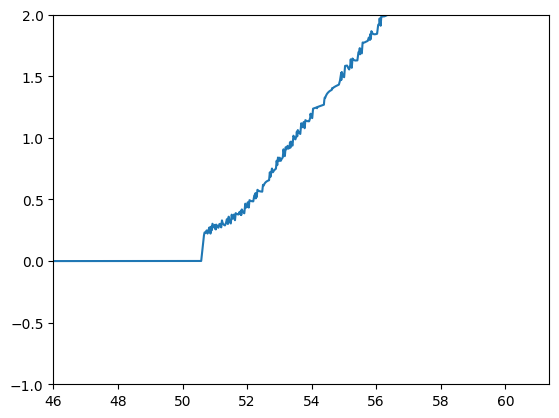

In [40]:
plt.plot(N2, t-tferm)
plt.ylim(-1,2.)
plt.xlim(46., max([*N1, *N4]))

In [41]:
kSferm = CubicSpline(t, kS)(tferm)

/tmp/ipykernel_15002/3354485261.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(N2, np.log(kSferm/kh2))
/tmp/ipykernel_15002/3354485261.py:1: RuntimeWarning: invalid value encountered in log
  plt.plot(N2, np.log(kSferm/kh2))


(-0.5, 0.5)

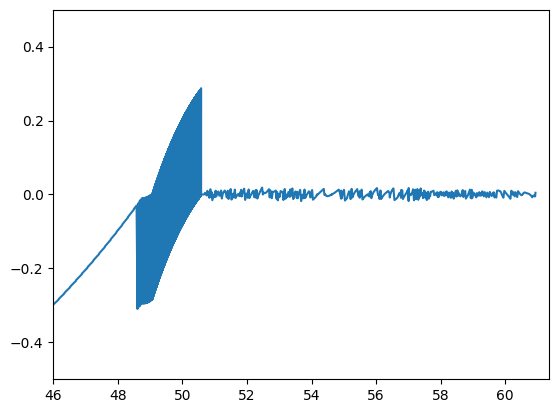

In [42]:
plt.plot(N2, np.log(kSferm/kh2))
plt.xlim(46., max([*N1, *N4]))
plt.ylim(-0.5, 0.5)

In [ ]:
plt.plot(N2, abs(delta2-CubicSpline(N3, delta3)(N2)))
plt.yscale("log")

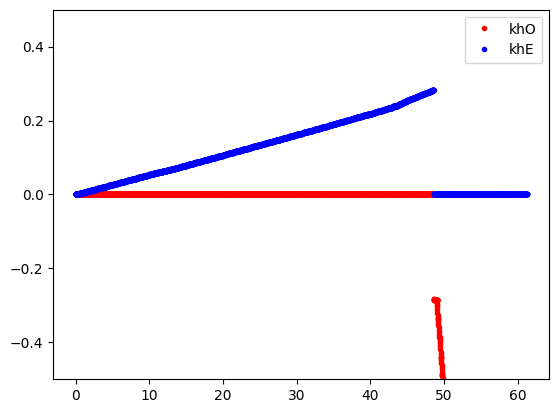

In [23]:
plt.plot(N2, np.zeros(kh2.size), "k-")
plt.plot(N2, np.log(khO/kh2), "r.", label="khO")
plt.plot(N2, np.log(khE/kh2), "b.", label="khE")
#plt.plot(N2, khO/kh2, "b:", label="khO")
#plt.plot(N2, kS/kh2, "g:", label="kS")
plt.legend(loc=0)
#plt.yscale("log")
#plt.xlim(48.5, 49.25)
plt.ylim(-0.5, 0.5)
plt.show()

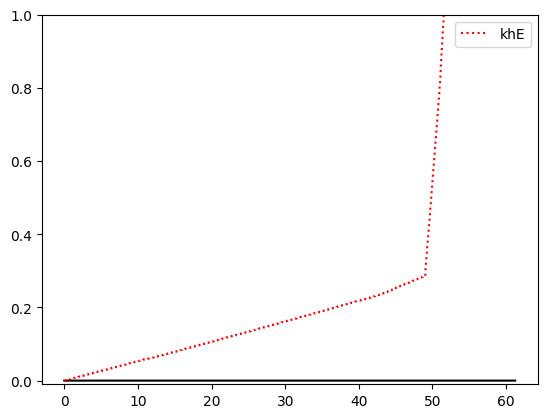

In [24]:
plt.plot(N2, np.zeros(kh2.size), "k-")
plt.plot(N2, np.log(khE/khO), "r:", label="khE")
#plt.plot(N2, khO/kh2, "b:", label="khO")
#plt.plot(N2, kS/kh2, "g:", label="kS")
plt.legend(loc=0)
#plt.yscale("log")
#plt.xlim(48.5, 50.5)
plt.ylim(-1e-2, 1)
plt.show()

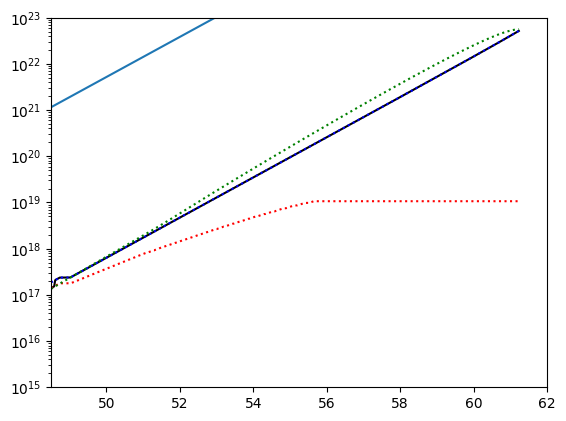

In [27]:
plt.plot(N2, kh2, "k")
plt.plot(N2, khE, "b:")
plt.plot(N2, khO, "r:")
plt.plot(N2, kS, "g:")
plt.plot(N2, np.exp(N2))
plt.xlim(48.5, 62)
plt.yscale("log")
plt.ylim(1e15, 1e23)
plt.show()

In [ ]:
np.where(abs(N2-48.7)<1e-2)[0][0]

Already Unitless
delta function created, access using x.deltaf


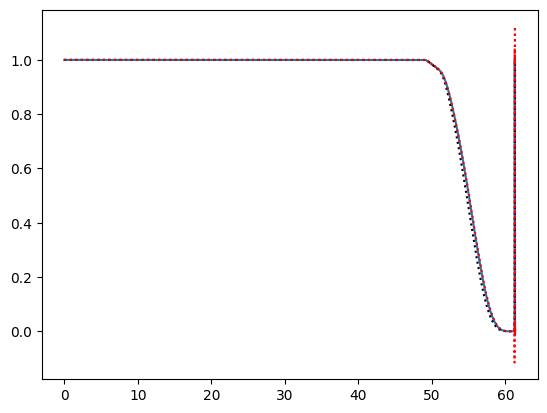

In [20]:
H.Unitless()
H.CreateDeltaFunction()
delta = H.deltaf(H.vals["t"])
plt.plot(N3, delta)
plt.plot(N2, delta2, "k:")
plt.plot(N3, delta3, "r:")



In [26]:
H.Unitless()
H.SaveData()

In [ ]:
H.Unitless()

ts = H.vals["t"]
kh = H.vals["kh"]
kS = H.vals["kS"]
sE = H.vals["sigmaE"]

sigmaf = CubicSpline(ts, sE)
khf = CubicSpline(ts, kh)
kSf = CubicSpline(ts, kS)
integral = []

for t in ts:
    f = lambda x: np.log(kSf(x)/khf(t))
    x = fsolve(f, t, xtol=1e-5)[0]
    #print(x)
    if (x<t):
        integral.append(quad(sigmaf, x, t)[0])
    else:
        integral.append(0.)
        
integral = np.array(integral)
delta = np.exp(-integral)
    
plt.plot(N2, delta)
plt.plot(N2, delta2, "k:")

In [ ]:
names = ["t", "N", "a", "dphi", "kh", "kS", "sigmaE", "E", "B", "G"]

val = [H.vals[name] for name in names]

data = dict(zip(names, val))
DirName = os.getcwd()
filename = "GEF_beta25_KDepSE.dat"
            
path = os.path.join(DirName, filename)

output_df = pd.DataFrame(data)  
output_df.to_csv(path)

3.814203717684728e-05


/tmp/ipykernel_17055/2738743542.py:13: RuntimeWarning: divide by zero encountered in divide
  gmu = np.sqrt(gmz**2/(1 + gmz**2*41./(48.*np.pi**2)*np.log(mz/(mu))))


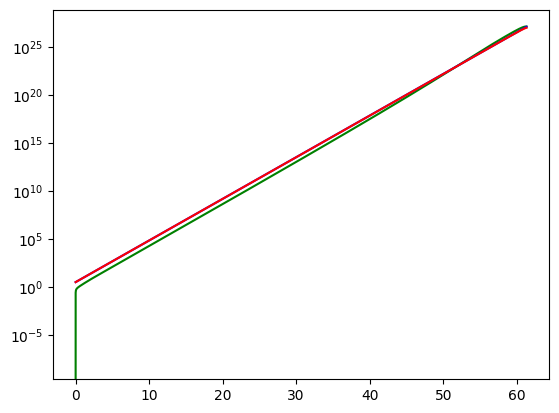

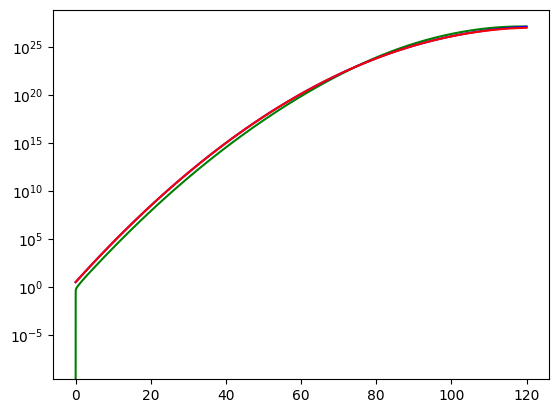

In [15]:
G.Unitless()
N = G.vals["N"]
t = G.vals["t"]
H = G.vals["H"]
E0 = G.vals["E"]
B0 = G.vals["B"]
xi = G.vals["xieff"]
a = G.vals["a"]
mu = ((E0+B0)/2)**(1/4)*G.H0
print(F.H0)
mz = 91.2/(1.220932e19)
gmz = 0.35
gmu = np.sqrt(gmz**2/(1 + gmz**2*41./(48.*np.pi**2)*np.log(mz/(mu))))
ks = a*np.sqrt(abs(gmu*E0**(1/2)))
khE = G.vals["kh"]
khO = 2*a*H*abs(xi)
plt.plot(N, ks, "g-")
plt.plot(N, khE, "b-")
plt.plot(N, khO, "r-")
plt.yscale("log")
plt.show()

plt.plot(t, ks, "g-")
plt.plot(t, khE, "b-")
plt.plot(t, khO, "r-")
plt.yscale("log")
plt.show()

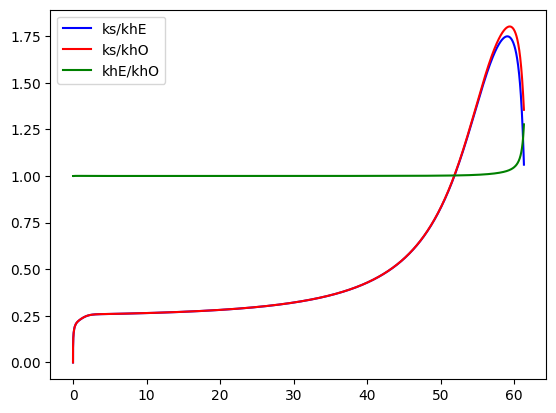

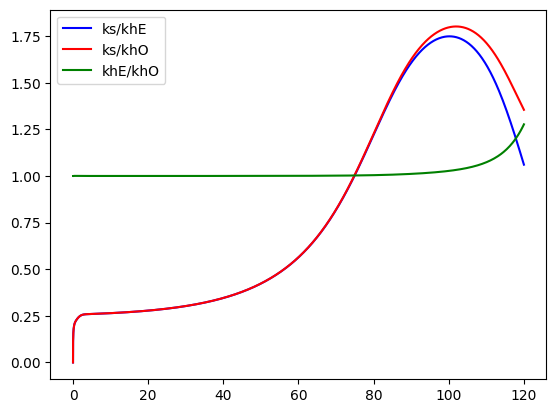

In [16]:
plt.plot(N, ks/khE, "b-", label="ks/khE")
plt.plot(N, ks/khO, "r-", label="ks/khO")
plt.plot(N, khE/khO, "g-", label="khE/khO")
plt.legend(loc=0)
plt.show()

plt.plot(t, ks/khE, "b-", label="ks/khE")
plt.plot(t, ks/khO, "r-", label="ks/khO")
plt.plot(t, khE/khO, "g-", label="khE/khO")
plt.legend(loc=0)
plt.show()

3.814203717684728e-05
[ 1.16658573  1.16658573  1.16658573 ... 62.43309273 62.45342685
 62.45897793]


/tmp/ipykernel_17055/3359179201.py:9: RuntimeWarning: divide by zero encountered in divide
  gmu = np.sqrt(gmz**2/(1 + gmz**2*41./(48.*np.pi**2)*np.log(mz/(mu))))
/tmp/ipykernel_17055/3359179201.py:12: RuntimeWarning: divide by zero encountered in log
  k1 = 0.25*np.log(E0) - kh + 0.5*np.log(gmu) + N1


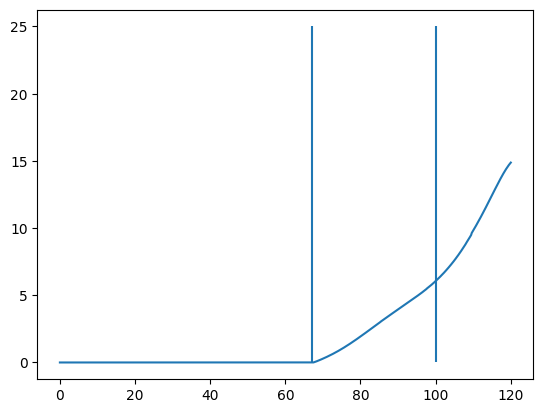

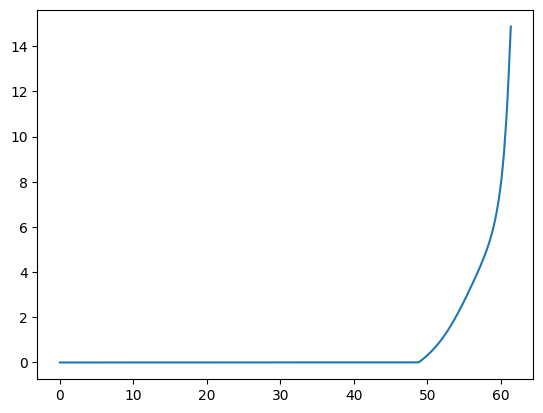

1.1526067083615573e-05
5.344922567508573
0.2707594813147624


'plt.plot(F.vals["t"], F.vals["t"] - k1/H*F.H0, "r-")\nplt.plot(F.vals["t"], F.vals["t"])\n#lt.xlim(51., max([*N1, *N4]))\n#plt.plot(N1, np.zeros(N1.size))\n#plt.xlim(45., 62)\n#plt.ylim(-0.01e6,0.2e6)\nplt.show()\n\nplt.plot(F.vals["t"], - k1/H*F.H0/F.vals["t"], "r-")\n#lt.xlim(51., max([*N1, *N4]))\nplt.plot(F.vals["t"], np.zeros(N1.size))\nplt.vlines(69, -0.035, 0.001)\n#plt.xlim(45., 62)\n#plt.ylim(-0.01e6,0.2e6)\nplt.show()'

In [17]:
F.Unitless()
H = F.vals["H"]
E0 = F.vals["E"]
B0 = F.vals["B"]
mu = ((E0+B0)/2)**(1/4)*F.H0
print(F.H0)
mz = 91.2/(1.220932e19)
gmz = 0.35
gmu = np.sqrt(gmz**2/(1 + gmz**2*41./(48.*np.pi**2)*np.log(mz/(mu))))
kh = np.log(F.vals["kh"])
print(kh)
k1 = 0.25*np.log(E0) - kh + 0.5*np.log(gmu) + N1
for i in range(len(k1)):
    if k1[i] < 0.:
        k1[i] = 0.

                
k1 = k1/H

plt.plot(F.vals["t"], k1)
plt.vlines(67., 0., 25)
plt.vlines(100., 0., 25)
plt.show()

plt.plot(F.vals["N"], k1)
plt.show()

k = CubicSpline(F.vals["t"], k1)
print(k(67.))
print(k(97.))
print((k(117)-k(67))/50.)

"""plt.plot(F.vals["t"], k1, "r-")
plt.plot(F.vals["t"], H)
#plt.xlim(45., 62)
plt.show()"""

"""plt.plot(F.vals["t"], F.vals["t"] - k1/H*F.H0, "r-")
plt.plot(F.vals["t"], F.vals["t"])
#lt.xlim(51., max([*N1, *N4]))
#plt.plot(N1, np.zeros(N1.size))
#plt.xlim(45., 62)
#plt.ylim(-0.01e6,0.2e6)
plt.show()

plt.plot(F.vals["t"], - k1/H*F.H0/F.vals["t"], "r-")
#lt.xlim(51., max([*N1, *N4]))
plt.plot(F.vals["t"], np.zeros(N1.size))
plt.vlines(69, -0.035, 0.001)
#plt.xlim(45., 62)
#plt.ylim(-0.01e6,0.2e6)
plt.show()"""

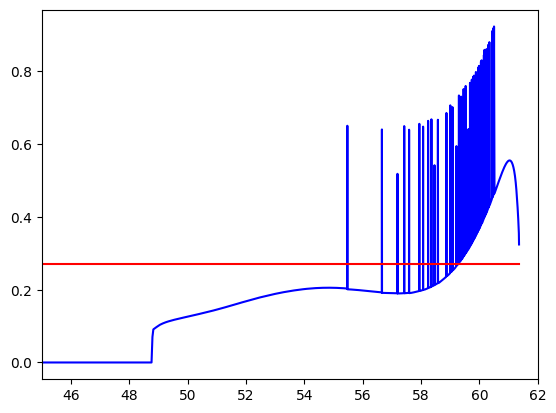

In [18]:
plt.plot(F.vals["N"][1:], ((k1[1:]-k1[:-1])/(F.vals["t"][1:] - F.vals["t"][:-1])), "b-")
#plt.plot(F.vals["t"][1:], F.vals["sigmaE"][1:]/(2*H[1:]), "r-")
plt.plot(F.vals["N"], np.ones(F.vals["t"].shape)*0.27, "r-")
#plt.plot(F.vals["t"], H/F.H0)
plt.xlim(45., 62)
plt.show()

In [17]:
a = np.arange(1,5)
print(a)
print(a[0:])

[1 2 3 4]
[1 2 3 4]
